<p align="center"><img alt="udeA logo" height="150px" src="https://github.com/freddyduitama/images/blob/master/logo.png?raw=true"></p><h1><font color='0B5345'> <center>

Probabilidad y estadística

 </center></font></h1>
<h2><font color='0B5345'> <center>
Segundo Proyecto: Estadística inferencial</center></font></h2>
<font  face="Courier New" size="3">

<p3><center><b><font color='0B5345' face="Lucida Calligraphy,Comic Sans MS,Lucida Console" size="5">Universidad de Antioquia - Bioingeniería</font></b> </center></p3>

### **INTRODUCCIÓN**

<style>
  .text-justify {
    text-align: justify;
  }
</style>

<p class="text-justify">
La enfermedad de Alzheimer, una de las afecciones neurodegenerativas más debilitantes y extendidas en el mundo, presenta un creciente desafío tanto para la comunidad médica como para la sociedad en general. Esta enfermedad, que afecta principalmente a la población de edad avanzada, se caracteriza por la pérdida progresiva de las funciones cognitivas, lo que conduce a la discapacidad y la dependencia en las actividades de la vida diaria. Dada su alta prevalencia y su impacto profundo en la calidad de vida de los pacientes y sus cuidadores, la investigación en torno a la enfermedad de Alzheimer es esencial para comprender mejor sus causas, su progresión y, en última instancia, para desarrollar estrategias efectivas de prevención y tratamiento.
</p>

<style>
  .text-justify {
    text-align: justify;
  }
</style>

<p class="text-justify">
En este contexto, la estadística inferencial emerge como una herramienta invaluable para analizar y extraer conocimientos significativos de los datos relacionados con la enfermedad de Alzheimer. A través de métodos estadísticos, podemos identificar patrones, relaciones y tendencias ocultas en los datos que pueden arrojar luz sobre factores de riesgo, biomarcadores, predictores de progresión de la enfermedad y la eficacia de intervenciones terapéuticas.
</p>

<style>
  .text-justify {
    text-align: justify;
  }
</style>

<p class="text-justify">
En este trabajo, exploraremos el potencial de la estadística inferencial en el contexto de la enfermedad de Alzheimer. Utilizaremos datos clínicos y demográficos de pacientes diagnosticados con Alzheimer(DTA), Deterioro cognitivo leve (DCL) y controles sanos para llevar a cabo un análisis riguroso y detallado. Nuestro objetivo es investigar cuestiones fundamentales, como la relación entre factores sociodemográficos y el riesgo de Alzheimer y la relación entre la enfermedad y la pérdida del volumen cerebral, para la identificación de marcadores tempranos de la enfermedad.
</p>
Los cambios en el volumen cerebral son una característica distintiva de la enfermedad de Alzheimer y se consideran uno de los marcadores clave de su progresión. A medida que la enfermedad avanza, el cerebro de una persona afectada por el Alzheimer experimenta una serie de cambios estructurales que afectan su tamaño y forma.


### **CONJUNTO DE DATOS**

En el contexto de la investigación sobre la enfermedad de Alzheimer, tenemos un conjunto de datos definidos de la siguiente manera: 

1. **Grupo (Clase)**: Esta variable categórica identifica la clasificación de los pacientes en tres grupos distintos: "Alzheimer", "DCL" (Deterioro Cognitivo Leve) y "Control". Cada grupo representa una categoría diagnóstica fundamental en nuestra investigación.

2. **Edad**: Esta variable numérica continua refleja la edad de los pacientes en años. La edad es un factor relevante en el estudio de la enfermedad de Alzheimer, ya que es más común en adultos mayores.

3. **Años de Educación (EDUC)**: Representa el nivel educativo de los pacientes en términos de los años completados de educación formal. Esta variable numérica discreta se utiliza para explorar la relación entre el nivel educativo y la enfermedad.

4. **Estrato Socioeconómico (SES)**: El estrato socioeconómico es una variable categórica ordinal que captura la posición socioeconómica de los pacientes en una escala del 1 al 5. Este factor puede influir en el acceso a la atención médica y otros determinantes de la salud.

5. **Puntuación en el Mini Examen del Estado Mental (MMSE)**: El MMSE es una variable numérica discreta que evalúa la función cognitiva de los pacientes. Las puntuaciones más bajas indican un mayor deterioro cognitivo.

6. **Clinical Dementia Rating (CDR)**: Esta variable ordinal refleja la calificación clínica de la demencia y se utiliza para evaluar la gravedad de la afección en diferentes niveles del 0 al 2.

7. **Volumen Intracraneal Total Estimado (eTIV)**: El eTIV es una medida numérica continua que representa el volumen total estimado dentro del cráneo de los pacientes. Se utiliza para evaluar la atrofia cerebral.

8. **Volumen Cerebral Total Normalizado (nWBV)**: Esta variable numérica continua mide el volumen cerebral total normalizado y se utiliza para evaluar el tamaño relativo del cerebro.

9. **Atlas Scaling Factor (ASF)**: El ASF es una variable numérica continua utilizada en estudios de neuroimagen para ajustar el tamaño de las estructuras cerebrales en relación con un atlas de referencia.

Estas variables proporcionan una visión detallada de los pacientes y los factores que podrían estar relacionados con la presencia y la progresión de esta afección neurodegenerativa.

### **ANÁLSIS EXPLORATORIO DE DATOS**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import numpy as np
from scipy import stats

In [2]:
df_alzheimer = pd.read_csv('alzheimer.csv',sep=";")
df_alzheimer

,Group,Sex,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Control,F,87,14,2,27,0.0,1987,0.696,0.883
1,Control,F,88,14,2,30,0.0,2004,0.681,0.876
2,DCL,F,75,12,3,23,0.5,1678,0.736,1.046
3,DCL,F,76,12,2,28,0.5,1738,0.713,1.010
4,DCL,F,80,12,3,22,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...
368,DCL,F,82,16,1,28,0.5,1693,0.694,1.037
369,DCL,F,86,16,1,26,0.5,1688,0.675,1.040
370,Control,M,61,13,2,30,0.0,1319,0.801,1.331
371,Control,M,63,13,2,30,0.0,1327,0.796,1.323


### Cuantificación de datos nulos

In [3]:
nan = df_alzheimer.isna().sum()
nan

Group    0
Sex      0
Age      0
Educ     0
SES      0
MMSE     0
CDR      0
eTIV     0
nWBV     0
ASF      0
dtype: int64

### Resumen estadístico

In [4]:
numeric_summary = df_alzheimer.describe()
print(f'Sujetos: {df_alzheimer.shape[0]} | caracteristicas: {df_alzheimer.shape[1]}')
numeric_summary

Sujetos: 373 | caracteristicas: 10


,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000
mean,77.013405,14.597855,2.495979,27.268097,0.290885,1490.809651,0.729568,1.195461
std,7.640957,2.876339,1.139756,3.811834,0.374557,175.826615,0.037135,0.138092
min,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,71.000000,12.000000,2.000000,27.000000,0.000000,1359.000000,0.700000,1.099000
50%,77.000000,15.000000,2.000000,29.000000,0.000000,1474.000000,0.729000,1.194000
75%,82.000000,16.000000,3.000000,30.000000,0.500000,1600.000000,0.756000,1.293000
max,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [5]:
clases = []
for group in df_alzheimer['Group'].unique():
    clases.append([group, (df_alzheimer['Group'] == group).sum()])
df_clases = pd.DataFrame(clases, columns=['Grupo', 'Cantidad'])
print(df_clases)


     Grupo  Cantidad
0  Control       190
1      DCL       146
2      DTA        37


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


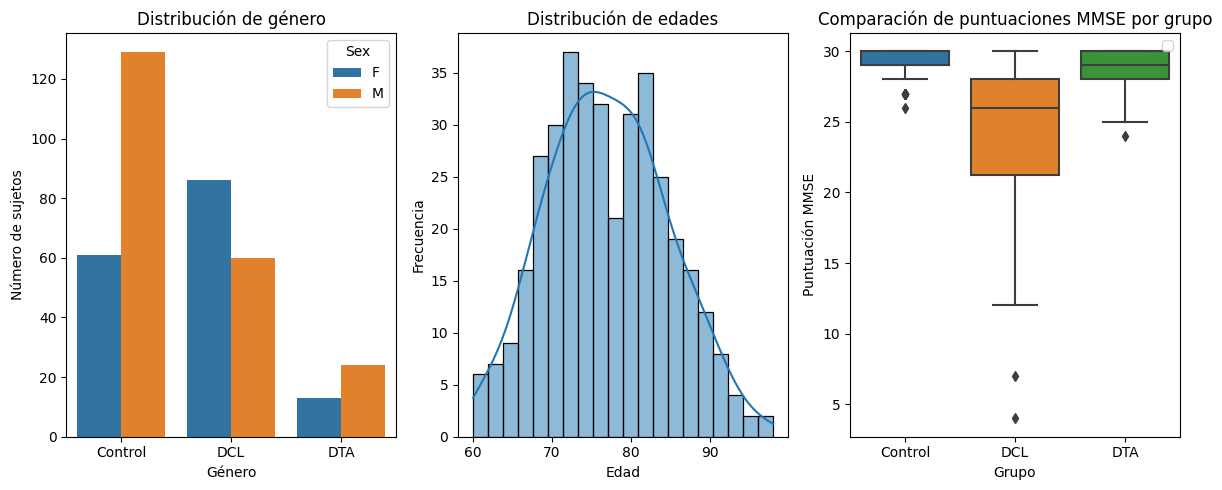

In [6]:
fig, axs = plt.subplots(1, 3, figsize=(12, 5))

# Gráfico 1: Distribución de género
sns.countplot(data=df_alzheimer, x='Group', hue='Sex',ax=axs[0])
axs[0].set_title('Distribución de género')
axs[0].set_xlabel('Género')
axs[0].set_ylabel('Número de sujetos')

# Gráfico 2: Histograma de edades
sns.histplot(data=df_alzheimer, x='Age', bins=20, kde=True, ax=axs[1])
axs[1].set_title('Distribución de edades')
axs[1].set_xlabel('Edad')
axs[1].set_ylabel('Frecuencia')

# Gráfico 3: Gráfico de caja y bigotes de puntuaciones MMSE por grupo
sns.boxplot(data=df_alzheimer, x='Group', y='MMSE', ax=axs[2])
axs[2].set_title('Comparación de puntuaciones MMSE por grupo')
axs[2].set_xlabel('Grupo')
axs[2].set_ylabel('Puntuación MMSE')
plt.legend()

plt.tight_layout()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


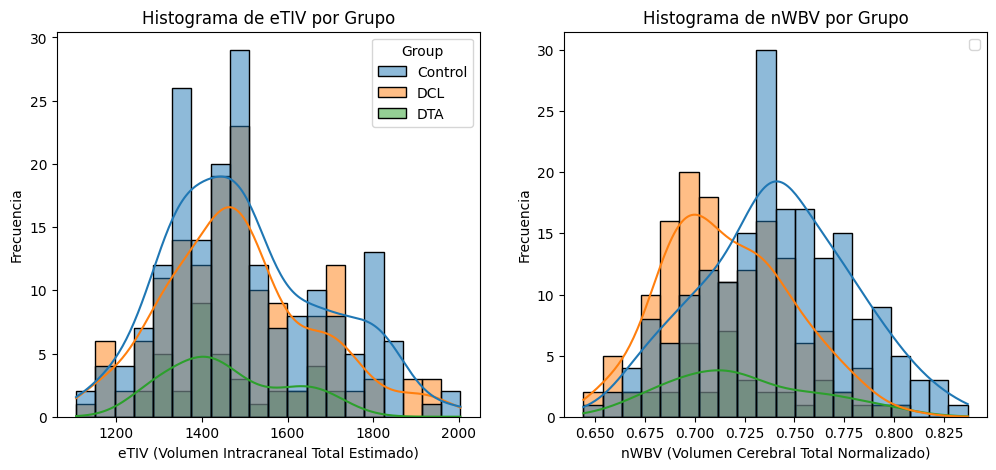

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))


sns.histplot(data=df_alzheimer, x='eTIV', hue='Group', bins=20, kde=True,legend=True,ax=axs[0])
axs[0].set_title('Histograma de eTIV por Grupo')
axs[0].set_xlabel('eTIV (Volumen Intracraneal Total Estimado)')
axs[0].set_ylabel('Frecuencia')

sns.histplot(data=df_alzheimer, x='nWBV', hue='Group', bins=20, kde=True,legend=True,ax=axs[1])
axs[1].set_title('Histograma de nWBV por Grupo')
axs[1].set_xlabel('nWBV (Volumen Cerebral Total Normalizado)')
axs[1].set_ylabel('Frecuencia')

plt.legend()
plt.show()

### **ANÁLISIS INFERENCIAL**


En el marco de nuestra investigación sobre la enfermedad de Alzheimer y el Deterioro Cognitivo Leve (DCL), se solicita realizar pruebas estadísticas de comparación en nuestro conjunto de datos. El objetivo de estas pruebas es analizar diferencias significativas entre grupos y variables clave para ampliar nuestro panorama sobre la enfermedad y sus factores asociados.

1. (15%) Compare la Puntuación en el Mini Examen del Estado Mental (MMSE) de los diferentes grupos de sujetos (DTA,DCL y control) y determine si existen diferencias significativas.  

En caso de que existan diferencias determine entre cuales grupos se presentan las diferencias. Para esto consulte las pruebas post hoc, impleméntelo y discuta las diferencias encontradas.

2. (15%) Determine si el volumen intracraneal de los sujetos con alzheimer (DTA) es menor, mayor o no difiere significativamente respecto al de los sujetos control. Discuta los resultados encontrados y compare con la literatura.

3. (15%) Tome solo el conjunto de datos del grupo control y determine si el volumen cerebral total normalizado (nWBV) es mayor en los hombres que en las mujeres. Discuta sus resultados y compare con la literatura para validar si los resultados obtenidos corresponden a los resultados esperados.

4. (15%) Se desea probar si las variables independientes estrato socioeconómico y sexo, tienen un efecto sobre la Puntuación en el Mini Examen del Estado Mental (MMSE). Discuta los resultados obtenidos.

Para cada una de las comparaciones solicitadas tenga en cuenta (20%):

1. Debe describir las razones por las cuales elige la prueba estadística que va a aplicar sobre sus datos.

2. Debe probar los supuestos de homogeneidad en la varianza y tipo de distribución de los datos.

3. Para cada una de las pruebas a utilizar determine cual es el nivel de significancia seleccionado y justifique por qué, tenga en cuenta la incidencia en los errores tipo I y tipo II.

4. Para cada una de las comparaciones defina la hipótesis nula y alternativa teniendo en cuenta el tipo de prueba que va a utilizar.
    
5. Si sus resultados no concuerdan con lo esperado según la literatura disponible, describa cuales pueden ser las posibles razones los resultados de las pruebas difieran.  

5. Conclusiones (10%)
6. Informe (10%)


### Parámetros de entregra

Entregar un informe en un Notebook, se tiene en cuenta el orden en la presentación de resultados, así como la pertenencia de las pruebas seleccionados.

El informe debe contener conclusiones de cada uno de los resultados presentados, sin el apartado de conclusiones no se revisa.

Finalmente la nota estará definida por el trabajo escrito y la sustentación por video (no mas de 15 min).

La nota del trabajo se define en la sustentación. Trabajo sin sustentación tiene como nota final 0.

**Trabajo escrito 70%, sustentación 30%.**

**Si usted decide no salir en el video se asume que no contribuyó al informe escrito.**

# Solución

Primero separamos el dataframe dependiendo de las variables de la columna "Group".

In [8]:
grupo_control = df_alzheimer[df_alzheimer['Group'] == 'Control']
grupo_dta = df_alzheimer[df_alzheimer['Group'] == 'DTA']
grupo_dcl = df_alzheimer[df_alzheimer['Group'] == 'DCL']

Establecemos el nivel de significancia alfa como alpha = 0.05, ya que es valor más usual en el análisis estadístico

In [9]:
alpha = 0.05

**1. (15%) Compare la Puntuación en el Mini Examen del Estado Mental (MMSE) de los diferentes grupos de sujetos (DTA,DCL y control) y determine si existen diferencias significativas.**  

Debido a que estamos evaluando las diferencias entre más de dos grupos la prueba más óptima es Anova, que nos detecta si nuestros grupos comparten media.

- (Ho): Hay diferencias significativas entre al menos dos de los grupos.
- (Ha): No hay diferencias significativas entre al menos dos de los grupos.

In [10]:
f_statistic, p_value = stats.f_oneway(grupo_dta['MMSE'], grupo_dcl['MMSE'], grupo_control['MMSE'])
print("Resultado del ANOVA:")
print("Valor F:", f_statistic)
print("Valor p:", p_value)

if p_value < alpha:
    print('\nConclusion: Hay diferencias significativas entre al menos dos de los grupos.')

Resultado del ANOVA:
Valor F: 111.62403897337751
Valor p: 1.171105670933111e-38

Conclusion: Hay diferencias significativas entre al menos dos de los grupos.


**En caso de que existan diferencias determine entre cuales grupos se presentan las diferencias. Para esto consulte las pruebas post hoc, impleméntelo y discuta las diferencias encontradas.**

La prueba de Tukey, nombrado después Juan Tukey, es una prueba estadística utilizada
general y conjuntamente con ANOVA, La prueba Tukey se usa en experimentos que
implican un número elevado de comparaciones.

Es de fácil cálculo puesto que se define un solo comparador, resultante del producto del
error estándar de la media por el valor tabular en la tabla de Tukey usando como
numerador el número de tratamientos y como denominador los grados de libertad
del error
Se conoce como Tukey-Kramer cuando las muestras no tienen el mismo número de
datos

In [11]:
# Realizar prueba post hoc (Tukey)
# Agrupar todas las puntuaciones MMSE
all_scores = np.concatenate([grupo_dta['MMSE'], grupo_dcl['MMSE'], grupo_control['MMSE']])

# Etiquetar los grupos
labels = ['DTA'] * len(grupo_dta) + ['DCL'] * len(grupo_dcl) + ['Control'] * len(grupo_control)

# Realizar la prueba Tukey para identificar diferencias significativas
tukey_result = pairwise_tukeyhsd(all_scores, labels, 0.05)

# Imprimir los resultados de la prueba post hoc
print("\nResultados de la prueba post hoc (Tukey):")
print(tukey_result)


Resultados de la prueba post hoc (Tukey):
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1 group2 meandiff p-adj  lower   upper  reject
----------------------------------------------------
Control    DCL  -4.8633    0.0 -5.645 -4.0816   True
Control    DTA  -0.5506 0.5677 -1.827  0.7257  False
    DCL    DTA   4.3127    0.0 3.0053    5.62   True
----------------------------------------------------


Según los resultados de la prueba de Tukey tenemos que el promedio de puntaje MMSE muy cercanos en los grupos de Control y los diagnosticados con Alzheimer (DTA). Por el contrario el grupo con deterioro cognitivo leve (DCL), es significativamente distinto al resto de grupos.

**2. (15%) Determine si el volumen intracraneal de los sujetos con alzheimer (DTA) es menor, mayor o no difiere significativamente respecto al de los sujetos control. Discuta los resultados encontrados y compare con la literatura.**

In [12]:
eTIV_dta = grupo_dta['eTIV']
eTIV_control = grupo_control['eTIV']

t_statistic, p_value = stats.ttest_ind(eTIV_dta, eTIV_control)

if p_value < alpha:
    if t_statistic < 0:
        conclusion = "El volumen intracraneal de DTA es menor que el de control (diferencia significativa)."
    else:
        conclusion = "El volumen intracraneal de DTA es mayor que el de control (diferencia significativa)."
else:
    conclusion = "No hay diferencia significativa en el volumen intracraneal entre DTA y control."

# Imprimir los resultados
print("Resultado de la prueba t:")
print("Estadística t:", t_statistic)
print("Valor p:", p_value)
print("\nConclusión:", conclusion)

Resultado de la prueba t:
Estadística t: -1.3032937619113096
Valor p: 0.19380655851339526

Conclusión: No hay diferencia significativa en el volumen intracraneal entre DTA y control.


**3. (15%) Tome solo el conjunto de datos del grupo control y determine si el volumen cerebral total normalizado (nWBV) es mayor en los hombres que en las mujeres. Discuta sus resultados y compare con la literatura para validar si los resultados obtenidos corresponden a los resultados esperados.**

In [13]:
# Tenemos que separar las mujeres de los hombres
control_mujeres = grupo_control[grupo_control['Sex'] == 'F']
control_hombres = grupo_control[grupo_control['Sex'] == 'M']

**Prueba t:** Para comparar la media entre los dos grupos, para esto tenemos que hacer las siguientes pruebas para verificar normalidad y homogeneidad
- Pruebe de Shapiro: Para confirmar la normalidad 
- Prueba de Levene: Para comprobar la homogeneidad 

PRUEBA DE SHAPIRO
- (Ho): Las distribuciones siguen una distribucion normal
- (Ha): Las distribuciones no siguen una distribucion normal


In [17]:
# Vamos a hallar el valor p para determinar las hipotesis de normalidad
stat_mujeres, p_valor_mujeres = stats.shapiro(control_mujeres['nWBV'])
stat_hombres, p_valor_hombres = stats.shapiro(control_hombres['nWBV'])

# Condicionales 
if p_valor_hombres > alpha and p_valor_mujeres > alpha:
    print('No se rechaza la hipotesis nula, SON NORMALES')
else:
    print("Se rechaza la hipotesis nula por lo que los datos no son normales")

No se rechaza la hipotesis nula, SON NORMALES


PRUEBA DE LEVENE
- (Ho): Las varianzas son similares
- (Ha): Las varianzas no se parecen

In [16]:
# Halla el valor p
stats_control, p_value_control = stats.levene(control_hombres['nWBV'], control_mujeres['nWBV'])

# Condicionales
if p_value_control > alpha:
    print('No se rechaza la hipotesis nula, LAS VARIANZAS SON SIMILARES')
else:
    print("Se rechaza la hipotesis nula por lo que los datos no son normales")

No se rechaza la hipotesis nula, LAS VARIANZAS SON SIMILARES


PRUEBA T
- (Ho): Los niveles de volumen total normalizado no es mayor en los hombres que en las mujeres
- (Ha): Los niveles de volumen total normalizado son maypres en los hombres 

In [ ]:
# Aplicar la prueba t de dos muestras
t_stadistic, p_valor = stats.ttest_ind(control_hombres['nWBV'], control_mujeres['nWBV'])

# Condicionales
if p_valor > alpha:
    print('No se rechaza la hipotesis nula, no hay sufienciente evidencia para afirmar que hay diferencias grandes entre las medias')
else:
    print("Se rechaza la hipotesis nula por lo que los niveles de volumen total normalizado en los hombres es mayor")

Se rechaza la hipotesis nula por lo que los niveles de volumen total normalizado en los hombres es mayor


**En lo teorico podemos verificar que el cerebro de las mujeres es aproximadamente 11% mas pequeño que el de los hombres, por lo que nuestros resultados son coherentes**  

**4. (15%) Se desea probar si las variables independientes estrato socioeconómico y sexo, tienen un efecto sobre la Puntuación en el Mini Examen del Estado Mental (MMSE). Discuta los resultados obtenidos.**

In [ ]:
# Tenemos que separar las mujeres de los hombres y los estratos socioeconomicos

#genero
grupo_masculino = df_alzheimer[df_alzheimer['Sex'] == 'M'] 
grupo_femenino = df_alzheimer[df_alzheimer['Sex'] == 'F'] 
#print(grupo_femenino)

#estratos
estrato_1 = df_alzheimer[df_alzheimer['SES'] == 1]
estrato_2 = df_alzheimer[df_alzheimer['SES'] == 2]  
estrato_3 = df_alzheimer[df_alzheimer['SES'] == 3] 
estrato_4 = df_alzheimer[df_alzheimer['SES'] == 4] 
estrato_5 = df_alzheimer[df_alzheimer['SES'] == 5] 
#print(estrato_1)

**Prueba t:** Para comparar la media entre los dos grupos, para esto tenemos que hacer las siguientes pruebas para verificar normalidad y homogeneidad
- Pruebe de Shapiro: Para confirmar la normalidad 
- Prueba de Levene: Para comprobar la homogeneidad 

PRUEBA DE SHAPIRO
- (Ho): Las distribuciones siguen una distribucion normal
- (Ha): Las distribuciones no siguen una distribucion normal

In [ ]:
# Vamos a hallar el valor p para determinar las hipotesis de normalidad

#genero
stat_mujeres, p_valor_mujeres = stats.shapiro(grupo_femenino['MMSE'])
stat_hombres, p_valor_hombres = stats.shapiro(grupo_masculino['MMSE'])

#estratos
stat_1, p_valor_1 = stats.shapiro(estrato_1['MMSE'])
stat_2, p_valor_2 = stats.shapiro(estrato_2['MMSE'])
stat_3, p_valor_3 = stats.shapiro(estrato_3['MMSE'])
stat_4, p_valor_4 = stats.shapiro(estrato_4['MMSE'])
stat_5, p_valor_5 = stats.shapiro(estrato_5['MMSE'])


print(p_valor_1)
print(p_valor_hombres)

# Condicionales GENERO
if p_valor_hombres > alpha and p_valor_mujeres > alpha:
    print('No se rechaza la hipotesis nula, los datos tienen distribucion normal')
else:
    print("Se rechaza la hipotesis nula, los datos no tienen distribucion normal")

# Condicionales ESTRATOS
if p_valor_1 > alpha and p_valor_2 > alpha and p_valor_3 > alpha and p_valor_4 > alpha and p_valor_5 > alpha:
    print('No se rechaza la hipotesis nula, los datos tienen distribucion normal')

else:
    print("Se rechaza la hipotesis nula, los datos no tienen distribucion normal")

9.300773279525328e-15
1.166466189132698e-19
Se rechaza la hipotesis nula, los datos no tienen distribucion normal
Se rechaza la hipotesis nula, los datos no tienen distribucion normal


PRUEBA DE LEVENE
- (Ho): Las varianzas son similares
- (Ha): Las varianzas no se parecen

In [ ]:
# Halla el valor p

#genero
stats_control, p_value_genero = stats.levene(grupo_masculino['MMSE'], grupo_femenino['MMSE'])
#print(p_value_control)

#estratos
stats_control, p_value_estrato = stats.levene(estrato_1['MMSE'], estrato_2['MMSE'], estrato_3["MMSE"] ,estrato_4["MMSE"], estrato_5["MMSE"])

#estrato

# Condicionales
#genero
if p_value_genero > alpha:
    print('No se rechaza la hipotesis nula, LAS VARIANZAS SON SIMILARES')
else:
    print("Se rechaza la hipotesis nula porque las varianzas son diferentes")

#estrato
if p_value_estrato > alpha:
    print('No se rechaza la hipotesis nula, LAS VARIANZAS SON SIMILARES')
else:
    print("Se rechaza la hipotesis nula porque las varianzas son diferentes")

Se rechaza la hipotesis nula porque las varianzas son diferentes
Se rechaza la hipotesis nula porque las varianzas son diferentes


PRUEBA T para los generos (son dos muestras)
- (Ho): El genero tiene un efecto sobre la puntuación en el Mini Examen del Estado Mental (MMSE)
- (Ha): El genero no tiene un efecto sobre la puntuación en el Mini Examen del Estado Mental (MMSE)


PRUEBA ANOVA para los estratos (son varias muestras a comparar)
- (Ho):El estrato tiene un efecto sobre la puntuación en el Mini Examen del Estado Mental (MMSE)
- (Ha): El estrato no tiene un efecto sobre la puntuación en el Mini Examen del Estado Mental (MMSE)

In [ ]:
# Aplicar la prueba t de dos muestras
t_stadistic, p_valor = stats.ttest_ind(grupo_femenino["MMSE"], grupo_masculino['MMSE'])
print(p_valor)

# Aplicar la prueba ANOVA de varias muestras
f_statistic, p_value_estrato = stats.f_oneway(estrato_1["MMSE"], estrato_2["MMSE"], estrato_3["MMSE"], estrato_4["MMSE"], estrato_5["MMSE"])
print(p_value_estrato)

# Condicionales

#genero
if p_valor > alpha:
    print('No se rechaza la hipotesis nula, el genero tiene un efecto sobre la puntuación en el Mini Examen del Estado Mental (MMSE)')
else:
    print("Se rechaza la hipotesis nula, por lo que el genero no tiene un efecto sobre la puntuación en el Mini Examen del Estado Mental (MMSE)")

#estrato

if p_value_estrato > alpha:
    print('No se rechaza la hipotesis nula, el estrato tiene un efecto sobre la puntuación en el Mini Examen del Estado Mental (MMSE)')
else:
    print("Se rechaza la hipotesis nula, el estrato no tiene un efecto sobre la puntuación en el Mini Examen del Estado Mental (MMSE)")

0.005470459114769705
0.0003195317393738108
Se rechaza la hipotesis nula, por lo que el genero no tiene un efecto sobre la puntuación en el Mini Examen del Estado Mental (MMSE)
Se rechaza la hipotesis nula, el estrato no tiene un efecto sobre la puntuación en el Mini Examen del Estado Mental (MMSE)


## Conclusiones

1. Si estás comparando dos grupos a la vez (por ejemplo, hombres frente a mujeres, clientes nuevos vs. existentes, empleados vs. gerentes, etc.), entonces es apropiado usar una prueba t de Student para evaluar la importancia de cualquier diferencia. Sin embargo, si hay más de dos grupos, es necesario recurrir a otra técnica.

2. Las personas con deterioro cognitivo tienen una media en el MMSE distinta al resto de grupos
3. Llevando a cabo una prueba tipo de t de dos muestras pudimos demostrar que el volumen total celebral normalizado es mayor en los hombres. Posteriormente comparando con la literatura pudimos corroborar que los resultados obtenidos son los indicados.